# Spectral Indices

**NDVI - Normalized Difference Vegetation Index**

NDVI is used to outline the presence of vegetation. It is used to indicate relative density, or the amount, of the green vegetation present in the image. This index uses reflectance from a red band around 0.66 μm and a near-Infrared band around 0.86 μm. The red band is found in the absorption region of the chlorophyll, while the near-IR band is used in high reflectance plateau of the vegetation canopies. These two bands sense different depths over the vegetation canopies.


$NDVI = \frac{NIR - RED}{NIR + RED} = \frac{B08 - B04}{B08 + B04}$


**NDWI - Normalized Difference Water Index**

NDWI concept as formulated by Gao combining reflectance of NIR and SWIR has a wide range of application. It can be used for exploring water content at single leaf level as well as canopy/satellite level. The range of application of NDWI spreads from agricultural monitoring for crop irrigation and pasture management to forest monitoring for assessing fire risk and live fuel moisture particularly relevant in the context of climate change.

$NDWI = \frac{NIR - SWIR}{NIR + SWIR} = \frac{B08 - B11}{B08 + B11}$

**NDSI - Normalized Difference Snow Index**

NDSI is used to delineate the presence of snow/ice. It is a standardized ratio of the difference in the reflectance in the bands that take advantage of unique signature and the spectral difference to indicate snow from the surrounding features and even clouds.

$NDSI = \frac{GREEN - SWIR}{GREEN + SWIR} = \frac{B03 - B11}{B03 + B11}$


**NBR - Normalized Burn Ratio**

To detect burned areas, the NBR index is the most appropriate choice. Using bands 8 and 12 it highlights burnt areas in large fire zones greater than 500 acres. To observe burn severity, you may subtract the post-fire NBR image from the pre-fire NBR image.

The NIR and SWIR parts of the electromagnetic spectrum are a powerful combination of bands to use for this index given vegetation reflects strongly in the NIR region of the electromagnetic spectrum and weekly in the SWIR. Alternatively, it has been shown that a fire scar which contains scarred woody vegetation and earth will reflect more strongly in the SWIR part of the electromagnetic spectrum and beyond (see figure below).

$NBR = \frac{NIR - SWIR}{NIR + SWIR} = \frac{B08 - B12}{B08 + B12}$


For a given area, NBR is calculated from an image just prior to the burn and a second NBR is calculated for an image immediately following the burn. Burn extent and severity is judged by taking the difference between these two index layers:

$dNBR = NBR_{prefire} - NBR_{postfire}$


**BAIS2 - Burned Area Index for Sentinel-2**

BAIS2 adapts the traditional BAI for Sentinel-2 bands, taking advantage of the wider spectrum of Visible, Red-Edge, NIR and SWIR bands.

Values description: The range of values for the BAIS2 is -1 to 1 for burn scars, and 1 - 6 for active fires. Different fire intensities may result in different thresholds, the current values were calibrates, as per original author, on mostly Mediterranen regions.

$BAIS2 = \left(1-\sqrt{\frac{B06*B07*B8A}{B4}}\right) *\left(\frac{B12-B8A}{\sqrt{B12+B8A}}+1\right)$

**BRIGHTNESS**

Brightness provide complementary information improving the discrimination between crop and no-crop areas.

$Brightness = \sqrt{GREEN^{2}+RED^{2}+NIR^{2}+SWIR^{2}} = \sqrt{B03^{2}+B04^{2}+B08^{2}+B11^{2}}$

**SWI - Surface Waterproofing Index**

SWI, based on NDVI and NDWI, is a useful tool for monitoring waterproofing.

$SWI = (NDVI - NDWI)^2$


[Source](https://eos.com/make-an-analysis/index-stack/)

In [1]:
import glob, os
import numpy as np
import pandas as pd
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt
from pathlib import Path

print('All libraries successfully imported!')

All libraries successfully imported!


**Set the index name you want to compute !**

- NDVI
- NDWI
- NDSI
- BRIGHTNESS
- NBR
- BAIS2
- SWI

In [2]:
index_name = 'NDVI'

nodata_val = -10000

print(f'You chose to compute {index_name} !')

You chose to compute NDVI !


**Set directory**

In [9]:
computer_path = '/export/miro/ndeffense/LBRAT2104/'
grp_letter    = 'X'

# Directory for all work files
work_path = f'{computer_path}GROUP_{grp_letter}/WORK/'

reflectance_path = f'{work_path}3_L2A_MASKED/'

index_path = f'{work_path}{index_name}/'

index_calc_path = f'{work_path}{index_name}_CALC/'

Path(index_path).mkdir(parents=True, exist_ok=True)
Path(index_calc_path).mkdir(parents=True, exist_ok=True)

> **What do you need to compute the selected spectral indices ?**

In [4]:
if index_name == 'NDVI':
    bands_needed = ['B04','B08']
    list_im_path = [reflectance_path,
                    reflectance_path]

elif index_name == 'NDWI':
    bands_needed = ['B08','B11']
    list_im_path = [reflectance_path,
                    reflectance_path]

elif index_name == 'NDSI':
    bands_needed = ['B03','B11']
    list_im_path = [reflectance_path,
                    reflectance_path]

elif index_name == 'BRIGHTNESS':
    bands_needed = ['B03','B04','B08','B11']
    list_im_path = [reflectance_path,
                    reflectance_path,
                    reflectance_path,
                    reflectance_path]

elif index_name == 'NBR':
    bands_needed = ['B08','B12']
    list_im_path = [reflectance_path,
                    reflectance_path]

elif index_name == 'BAIS2':
    bands_needed = ['B04','B06','B07','B8A','B12']
    list_im_path = [reflectance_path,
                    reflectance_path,
                    reflectance_path,
                    reflectance_path]

elif index_name == 'SWI':
    bands_needed = ['NDVI','NDWI']
    list_im_path = [f'{work_path}NDVI/',
                    f'{work_path}NDWI/']


print(f'To compute {index_name} you need : {bands_needed}')

To compute NDVI you need : ['B04', 'B08']


**Check if you have the necessary spectral bands**

In [5]:
for i,band in enumerate(bands_needed):
    
    print(f'We need band/index {band} to compute {index_name}')
    list_im = glob.glob(f'{list_im_path[i]}*{band}*.tif')
    
    nb_im = len(list_im)
    print(f'--> {nb_im} images are found \n')

print('Check if the number of images found for each band/index is the same !!')


We need band/index B04 to compute NDVI
--> 12 images are found 

We need band/index B08 to compute NDVI
--> 12 images are found 

Check if the number of images found for each band/index is the same !!


## Compute spectral index selected for all images

In [6]:
for i in range(0,nb_im):
    
    im = sorted(glob.glob(f'{list_im_path[0]}*{bands_needed[0]}*.tif'))[i]
    date = os.path.basename(im)[7:15]
    print(f'Date : {date}')

    list_im = [im]

    for n,band in enumerate(bands_needed[1:]):
        im = glob.glob(f'{list_im_path[n+1]}*{date}*{band}*.tif')[0]
        list_im.append(im)

    # Name the output SI file
    index_file = f'{index_path}{os.path.basename(list_im[0])[0:22]}_{index_name}.tif'
    
    if not os.path.isfile(index_file):
        
        # Create a list with all reflectance images needed to compute the SI in Numpy array
        list_im_arr = []

        for im_file in list_im:

            # Open band and update metadata
            src = rasterio.open(im_file, 'r')
            profile = src.profile
            profile.update(dtype=rasterio.float64)
            im = src.read(1)

            # Convert no-data value into Numpy NaN
            im = im.astype(np.float)
            im[im == nodata_val] = np.nan
            
            src.close()

            list_im_arr.append(im)
        
        # Compute Spectral Index
        
        if index_name == 'NDVI':
            red = list_im_arr[0] # B04
            nir = list_im_arr[1] # B08

            index_arr = (nir - red) / (nir + red)

        elif index_name == 'NDWI':
            nir  = list_im_arr[0] # B08
            swir = list_im_arr[1] # B11

            index_arr = (nir - swir) / (nir + swir)
        
        elif index_name == 'NDSI':
            green = list_im_arr[0] # B03
            swir  = list_im_arr[1] # B11 
            
            index_arr = (green - swir) / (green + swir)
        
        elif index_name == 'NBR':
            nir  = list_im_arr[0] # B08
            swir = list_im_arr[1] # B12

            index_arr = (nir - swir) / (nir + swir)
        
        elif index_name == 'BRIGHTNESS':
            green = list_im_arr[0] # B03
            red   = list_im_arr[1] # B04
            nir   = list_im_arr[2] # B08
            swir  = list_im_arr[3] # B11

            index_arr = np.sqrt(np.square(green) + np.square(red) + np.square(nir) + np.square(swir))

        elif index_name == 'BAIS2':
            red         = list_im_arr[0] # B04
            redEdge_B6  = list_im_arr[1] # B06
            redEdge_B7  = list_im_arr[2] # B07
            nir         = list_im_arr[3] # B08
            swir        = list_im_arr[4] # B12
            
            index_arr = (1-np.sqrt((redEdge_B6*redEdge_B7*nir)/red))*((swir-nir)/(np.sqrt(swir+nir))+1)
        
        elif index_name == 'SWI':
            ndvi = list_im_arr[0] # NDVI
            ndwi = list_im_arr[1] # NDWI

            index_arr = np.square(ndvi - ndwi)
        
        # Write Spectral Index image into GeoTIFF

        dst = rasterio.open(index_file, "w", **profile)
        dst.write(index_arr,1)
        dst.close()

        print(f'A new {index_name} file is created : {index_file}')
    

print(f'--> All {index_name} are computed !')


Date : 20200116
Date : 20200212
Date : 20200316
Date : 20200417
Date : 20200520
Date : 20200621
Date : 20200719
Date : 20200813
Date : 20200914
Date : 20201019
Date : 20201118
Date : 20201218
--> All NDVI are computed !


## Plot a spectral index

Open spectral index file with rasterio

In [7]:
im_file = glob.glob(f'{index_path}*20200621*.tif')[0]

print(im_file)
src = rasterio.open(im_file, "r")

/export/miro/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI/T31UFS_20200621T103629_NDVI.tif


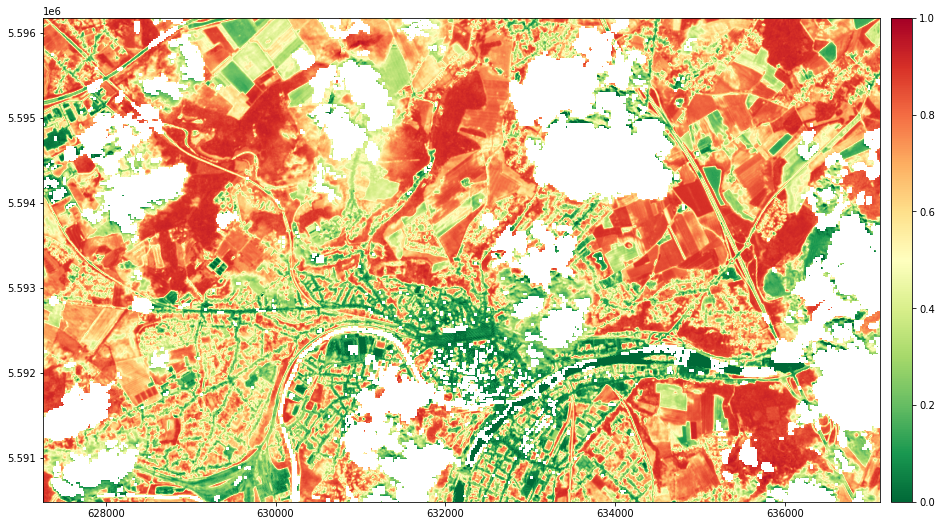

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

color_map = plt.cm.get_cmap("RdYlGn")
reversed_color_map = color_map.reversed()


im_rio = rasterio.plot.show(src, cmap=reversed_color_map, vmin=0, vmax=1, ax=ax)
im_rio = im_rio.get_images()[0]

cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im_rio, ax=ax, cax=cax)

plt.box(False)

## Compute difference between spectral indices

In [13]:
# Choose the two dates you want to subtract
date_1 = '20200116'
date_2 = '20201218'

In [14]:
# Get the spectral indices associated with the dates you have chosen
index_file_1 = glob.glob(f'{index_path}*{date_1}*.tif')[0]
index_file_2 = glob.glob(f'{index_path}*{date_2}*.tif')[0]

# Name the output index file
index_file_diff = f'{index_calc_path}{index_name}_{date_2}_MINUS_{date_1}.tif'

if not os.path.isfile(index_file_diff):

    # Open the spectral index at date 1
    src = rasterio.open(index_file_1, 'r')
    profile = src.profile
    date_1_arr = src.read(1)
    src.close()

    # Open the spectral index at date 2
    src = rasterio.open(index_file_2, 'r')
    date_2_arr = src.read(1)
    src.close()

    # Compute the difference between date 2 and date 1
    diff_index = date_2_arr - date_1_arr

    # Write the output in GeoTIFF
    dst = rasterio.open(index_file_diff, "w", **profile)
    dst.write(diff_index,1)
    dst.close()
    
    print(f'A new {index_file_diff} file is created : {index_file_diff}')
    
else:
    print(f'--> {index_file_diff} - already exists')

A new /export/miro/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI_CALC/NDVI_20201218_MINUS_20200116.tif file is created : /export/miro/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI_CALC/NDVI_20201218_MINUS_20200116.tif
